In [6]:
import numpy as np
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt

In [7]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma = 1.0, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma=1.0):
    v = np.zeros(env.nS)
    eps = 1e-5
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))
    max_iterations = 200000
    for i in range(max_iterations):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            k=i+1
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy,k

Policy-Iteration converged at step 17.
[4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 5. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2.
 1. 2. 0. 2. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 2. 3. 2.
 3. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 2. 2. 2. 2. 3. 1. 3. 2. 3. 3. 3. 3.
 1. 1. 1. 1. 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 3. 3. 3. 3. 1. 1. 1. 1.
 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1.

Policy-Iteration converged at step 18.
[4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 3. 3. 3. 3.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 4. 4. 4. 4. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 5. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 2. 2. 2. 2. 0. 0. 0. 0. 2. 2. 2. 2.
 1. 2. 0. 2. 1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3. 2. 2. 2. 2. 1. 2. 3. 2.
 3. 3. 3. 3. 1. 1. 1. 1. 3. 3. 3. 3. 2. 2. 2. 2. 3. 1. 3. 2. 3. 3. 3. 3.
 1. 1. 1. 1. 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 3. 3. 3. 3. 1. 1. 1. 1.
 3. 3. 3. 3. 0. 0. 0. 0. 3. 1. 3. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 1. 1.

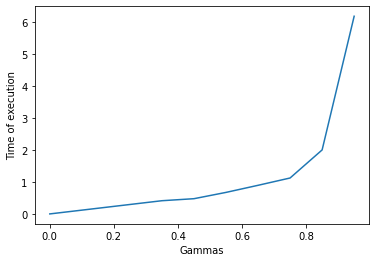

Average scores =  2.0591249786678913


In [8]:
env_name  = 'Taxi-v3'
env = gym.make(env_name)
env = env.unwrapped
times=[0]*10
gammas=[0]*10
iterations=[0]*10
listscore=[0]*10
for i in range(3,10):
    start=time.time()
    optimal_policy,k = policy_iteration(env, gamma = (i+0.5)/10)
    scores = evaluate_policy(env, optimal_policy, gamma = (i+0.5)/10)
    end=time.time()
    gammas[i]=(i+0.5)/10
    listscore[i]=np.mean(scores)
    iterations[i]=k
    times[i]=end-start
    print(optimal_policy)
plt.plot(gammas[2:], times[2:])
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.show()
print('Average scores = ', np.mean(scores))